<a href="https://colab.research.google.com/github/OJB-Quantum/Qiskit-Metal-to-Litho/blob/main/Egg_White_Resist_E_Beam_Penetration_Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np

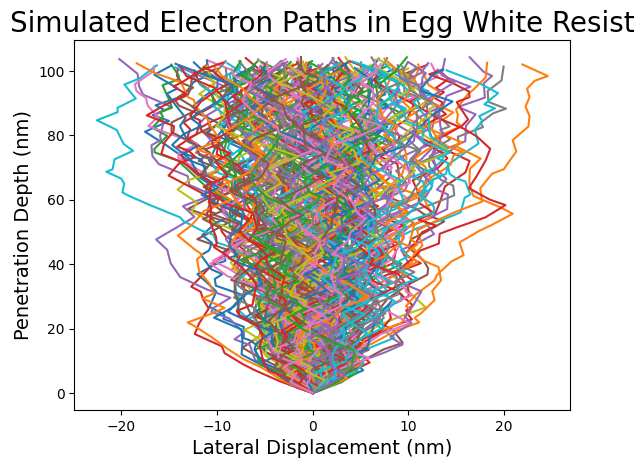

<Figure size 2400x1500 with 0 Axes>

In [6]:
# Calculate a 100 keV electron-beam path in an egg white resist based on the paper found at https://onlinelibrary.wiley.com/doi/epdf/10.1002/admi.201601223
# Full-access paper title: 'Water-Based Photo- and Electron-Beam Lithography Using Egg White as a Resist'
# Monte Carlo simulation

# Constants
energy_keV = 100  # Beam energy in keV
dose_uC_cm2 = 3000  # Beam dose in microcoulombs per cm^2 for positive pattern
thickness_nm = 100  # Resist thickness in nm
electron_charge = 1.602e-19  # Charge of an electron in Coulombs
area_cm2 = 1e-14  # Area in cm^2 for single electron simulation (arbitrarily small for simulation purposes)

# Calculations for the number of electrons per area
dose_C_cm2 = dose_uC_cm2 * 1e-6  # Convert microcoulombs to coulombs
num_electrons = dose_C_cm2 / electron_charge  # Calculate the number of electrons per cm^2

# Monte Carlo simulation parameters
num_electrons_simulated = int(num_electrons * area_cm2)  # Scale number of electrons to the simulation area
penetration_depths = []  # To store penetration depths

# Define penetration depth function for the egg white resist
# Assumption: Using a simple model where each interaction with the resist material reduces energy by a fixed amount
# until energy falls below a threshold value, simulating the electron stopping in the resist.

def simulate_electron_paths(num_electrons, energy_keV, thickness_nm):
    # Assuming simplistic linear penetration with energy reduction at each step
    # and a random scattering angle introducing some deviation in the path.
    paths = []
    for _ in range(num_electrons):
        energy_remaining = energy_keV
        depth = 0
        path = {'x': [0], 'z': [0]}  # Start at origin
        while energy_remaining > 0 and depth < thickness_nm:
            # Simulate a step
            scattering_angle = np.random.uniform(-np.pi/4, np.pi/4)  # Random angle within -45 to 45 degrees
            step_length = np.random.uniform(1, 5)  # Random step length between 1 nm and 5 nm
            depth += step_length * np.cos(scattering_angle)  # Increment depth based on step length and angle
            lateral_displacement = step_length * np.sin(scattering_angle)  # Calculate lateral displacement
            # Update path
            path['x'].append(path['x'][-1] + lateral_displacement)
            path['z'].append(depth)
            # Reduce energy
            energy_remaining -= step_length * 0.1  # Arbitrary energy reduction per nm
        paths.append(path)
    return paths

# Run the simulation
electron_paths = simulate_electron_paths(num_electrons_simulated, energy_keV, thickness_nm)

# Plot the results
fig, ax = plt.subplots()
plt.figure(figsize=(8,5), dpi=300)
for path in electron_paths:
    ax.plot(path['x'], path['z'])

ax.set_xlabel('Lateral Displacement (nm)', fontdict={'fontsize':14})
ax.set_ylabel('Penetration Depth (nm)', fontdict={'fontsize':14})
ax.set_title('Simulated Electron Paths in Egg White Resist', fontdict={'fontsize':20})
plt.show()


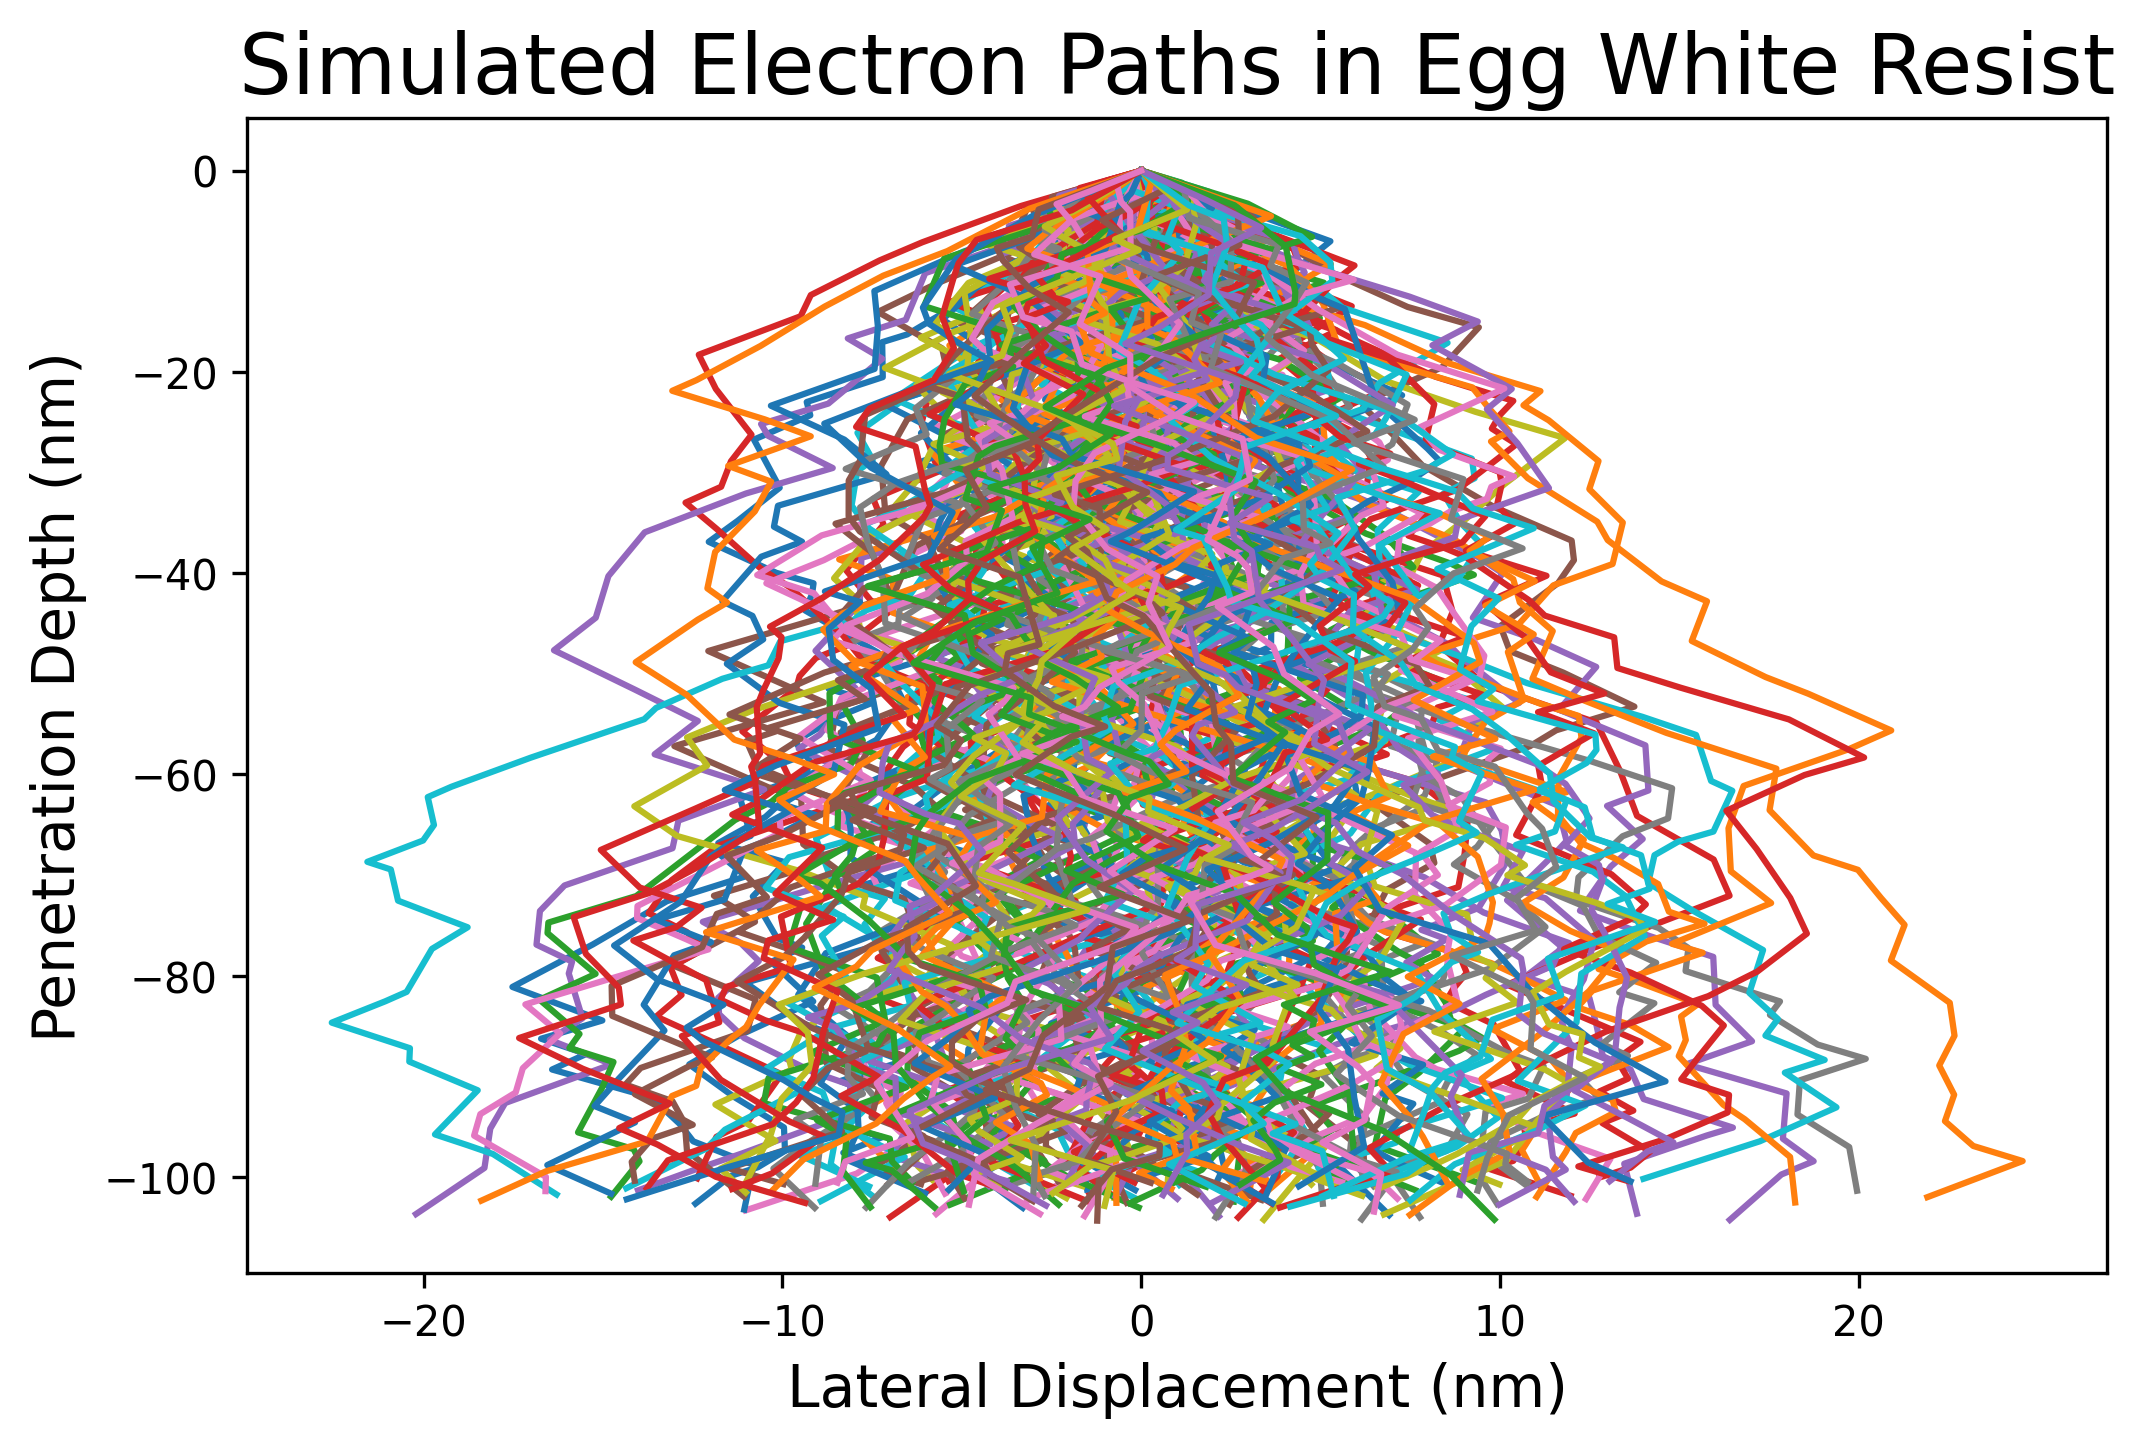

In [7]:
# Adjusting plot parameters including title font size, axis font size, figure size, and dpi

fig, ax = plt.subplots(figsize=(8, 5), dpi=300)
for path in electron_paths:
    ax.plot(path['x'], -np.array(path['z']))  # Multiply the z values by -1 to flip the plot

ax.set_xlabel('Lateral Displacement (nm)', fontsize=14)
ax.set_ylabel('Penetration Depth (nm)', fontsize=14)
ax.set_title('Simulated Electron Paths in Egg White Resist', fontsize=20)
plt.show()


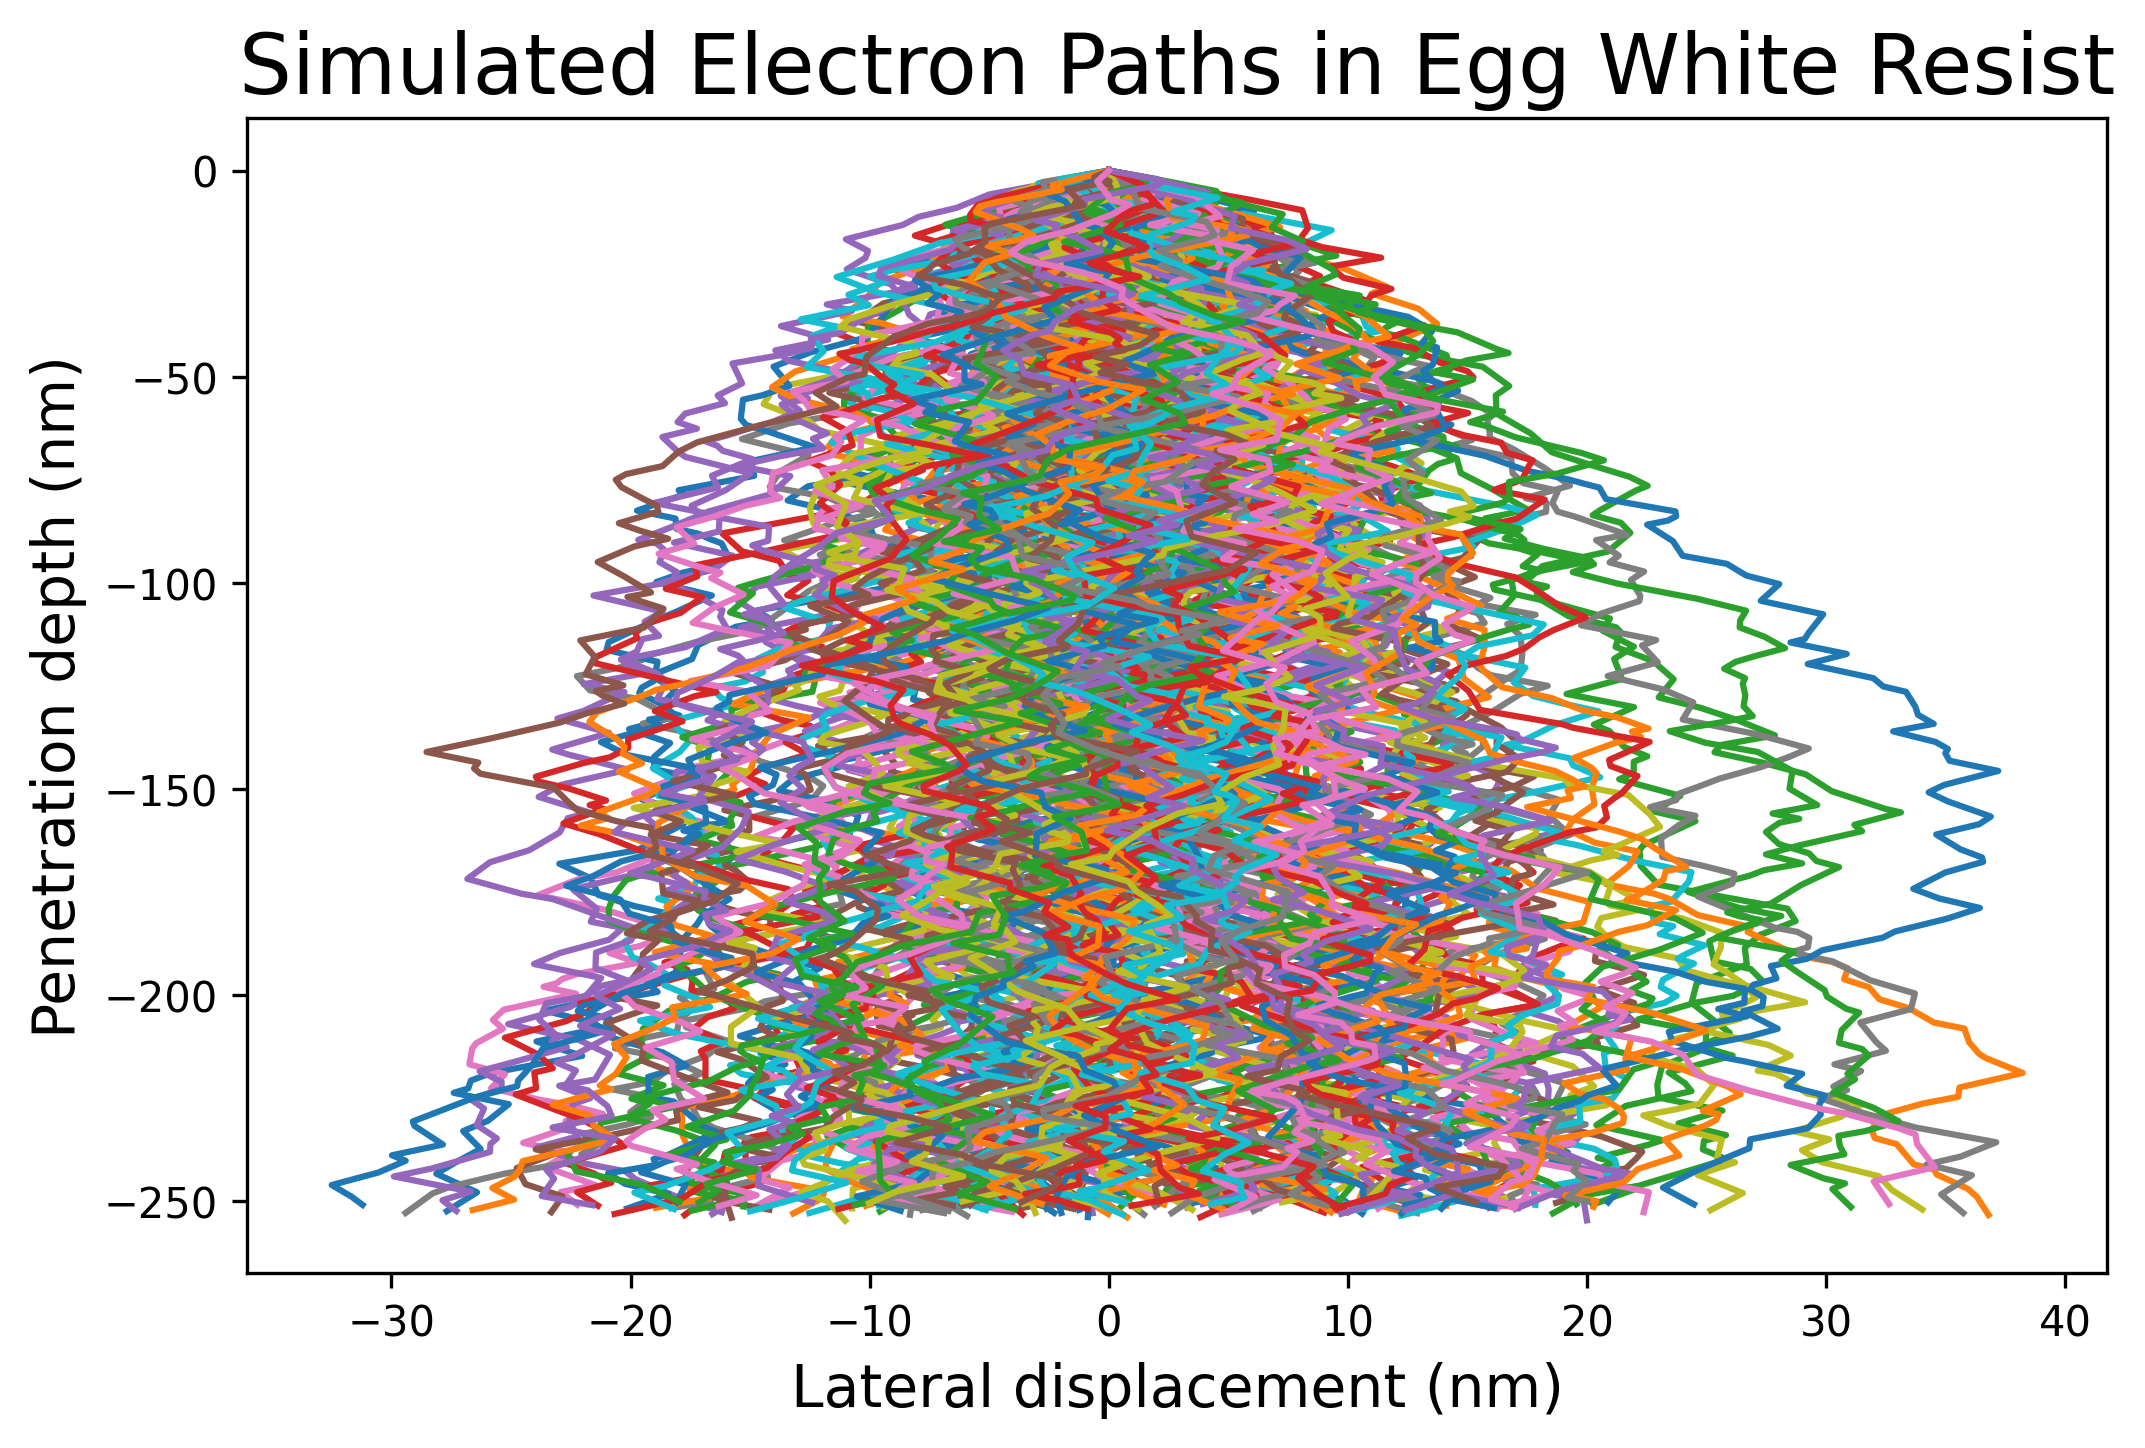

In [5]:
# Try with 250 nm resist thickness

# Constants
energy_keV = 100  # Beam energy in keV
dose_uC_cm2 = 3000  # Beam dose in microcoulombs per cm^2 for positive pattern
thickness_nm = 250  # Resist thickness in nm
electron_charge = 1.602e-19  # Charge of an electron in Coulombs
area_cm2 = 1e-14  # Area in cm^2 for single electron simulation (arbitrarily small for simulation purposes)

# Calculations for the number of electrons per area
dose_C_cm2 = dose_uC_cm2 * 1e-6  # Convert microcoulombs to coulombs
num_electrons = dose_C_cm2 / electron_charge  # Calculate the number of electrons per cm^2

# Monte Carlo simulation parameters
num_electrons_simulated = int(num_electrons * area_cm2)  # Scale number of electrons to the simulation area
penetration_depths = []  # To store penetration depths

# Define penetration depth function for the egg white resist
# Assumption: Using a simple model where each interaction with the resist material reduces energy by a fixed amount
# until energy falls below a threshold value, simulating the electron stopping in the resist.

def simulate_electron_paths(num_electrons, energy_keV, thickness_nm):
    # Assuming simplistic linear penetration with energy reduction at each step
    # and a random scattering angle introducing some deviation in the path.
    paths = []
    for _ in range(num_electrons):
        energy_remaining = energy_keV
        depth = 0
        path = {'x': [0], 'z': [0]}  # Start at origin
        while energy_remaining > 0 and depth < thickness_nm:
            # Simulate a step
            scattering_angle = np.random.uniform(-np.pi/4, np.pi/4)  # Random angle within -45 to 45 degrees
            step_length = np.random.uniform(1, 5)  # Random step length between 1 nm and 5 nm
            depth += step_length * np.cos(scattering_angle)  # Increment depth based on step length and angle
            lateral_displacement = step_length * np.sin(scattering_angle)  # Calculate lateral displacement
            # Update path
            path['x'].append(path['x'][-1] + lateral_displacement)
            path['z'].append(depth)
            # Reduce energy
            energy_remaining -= step_length * 0.1  # Arbitrary energy reduction per nm
        paths.append(path)
    return paths

# Run the simulation
electron_paths = simulate_electron_paths(num_electrons_simulated, energy_keV, thickness_nm)

# Plot results
fig, ax = plt.subplots(figsize=(8, 5), dpi=300)
for path in electron_paths:
    ax.plot(path['x'], -np.array(path['z']))  # Multiply the z values by -1 to flip the plot

ax.set_xlabel('Lateral Displacement (nm)', fontsize=14)
ax.set_ylabel('Penetration Depth (nm)', fontsize=14)
ax.set_title('Simulated Electron Paths in Egg White Resist', fontsize=20)
plt.show()

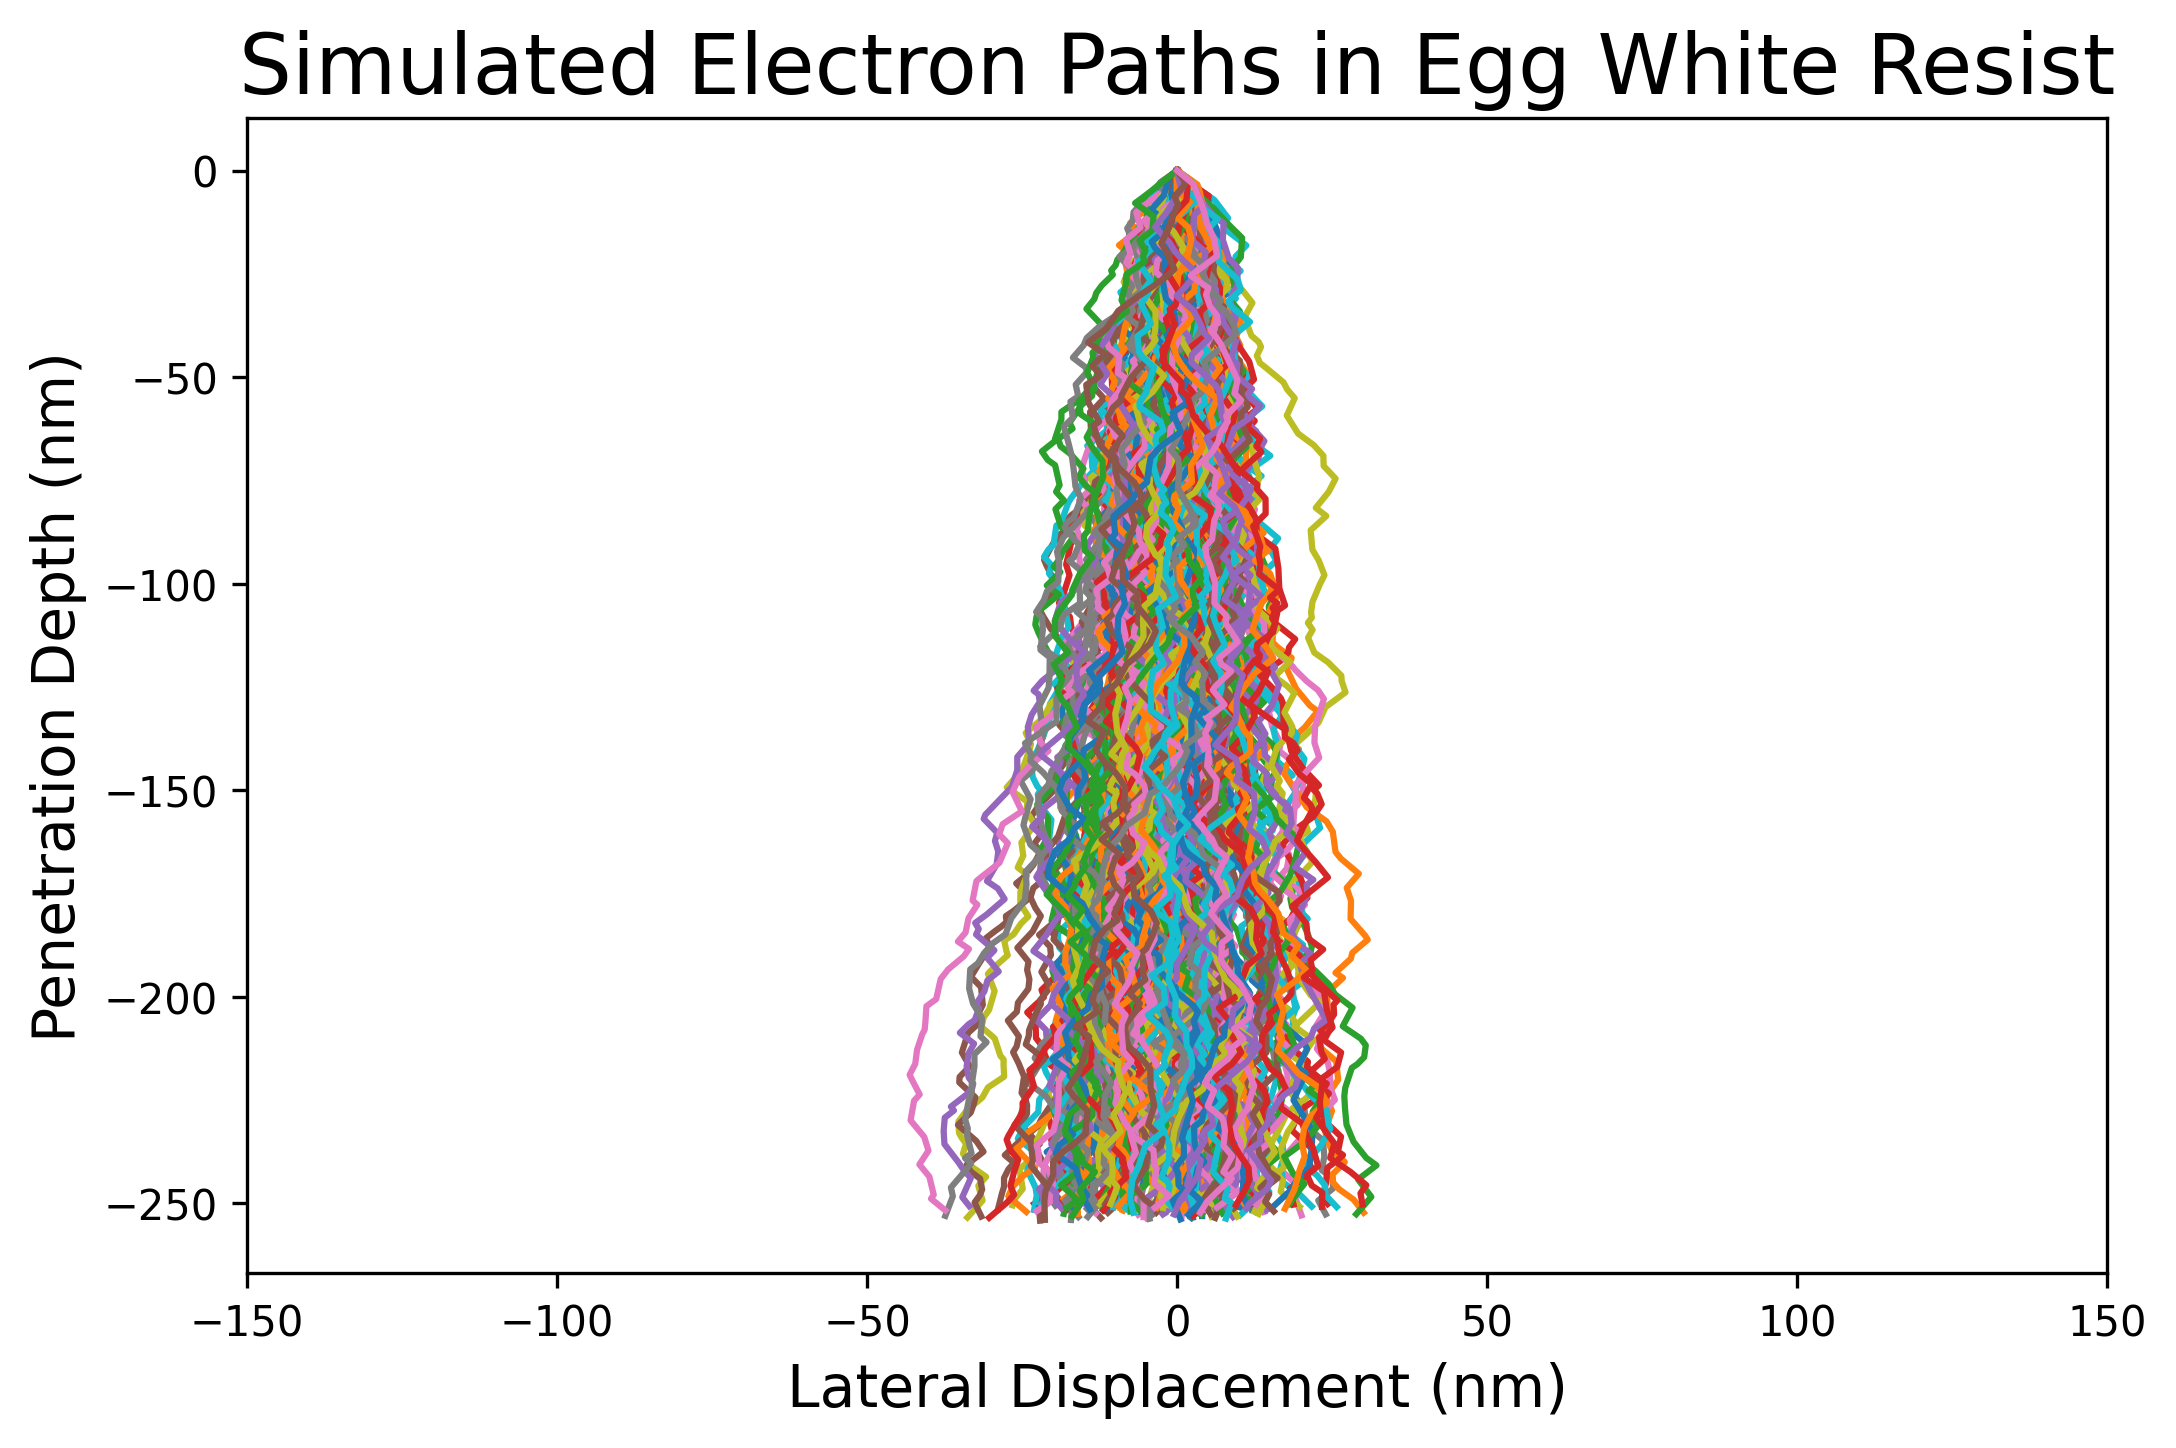

In [10]:
# Try with 250 nm resist thickness

# Constants
energy_keV = 100  # Beam energy in keV
dose_uC_cm2 = 3000  # Beam dose in microcoulombs per cm^2 for positive pattern
thickness_nm = 250  # Resist thickness in nm
electron_charge = 1.602e-19  # Charge of an electron in Coulombs
area_cm2 = 1e-14  # Area in cm^2 for single electron simulation (arbitrarily small for simulation purposes)

# Calculations for the number of electrons per area
dose_C_cm2 = dose_uC_cm2 * 1e-6  # Convert microcoulombs to coulombs
num_electrons = dose_C_cm2 / electron_charge  # Calculate the number of electrons per cm^2

# Monte Carlo simulation parameters
num_electrons_simulated = int(num_electrons * area_cm2)  # Scale number of electrons to the simulation area
penetration_depths = []  # To store penetration depths
x_range_nm = (-150, 150)  # X-axis range for plotting

# Define penetration depth function for the egg white resist
# Assumption: Using a simple model where each interaction with the resist material reduces energy by a fixed amount
# until energy falls below a threshold value, simulating the electron stopping in the resist.

def simulate_electron_paths(num_electrons, energy_keV, thickness_nm):
    # Assuming simplistic linear penetration with energy reduction at each step
    # and a random scattering angle introducing some deviation in the path.
    paths = []
    for _ in range(num_electrons):
        energy_remaining = energy_keV
        depth = 0
        path = {'x': [0], 'z': [0]}  # Start at origin
        while energy_remaining > 0 and depth < thickness_nm:
            # Simulate a step
            scattering_angle = np.random.uniform(-np.pi/4, np.pi/4)  # Random angle within -45 to 45 degrees
            step_length = np.random.uniform(1, 5)  # Random step length between 1 nm and 5 nm
            depth += step_length * np.cos(scattering_angle)  # Increment depth based on step length and angle
            lateral_displacement = step_length * np.sin(scattering_angle)  # Calculate lateral displacement
            # Update path
            path['x'].append(path['x'][-1] + lateral_displacement)
            path['z'].append(depth)
            # Reduce energy
            energy_remaining -= step_length * 0.1  # Arbitrary energy reduction per nm
        paths.append(path)
    return paths

# Run the simulation
electron_paths = simulate_electron_paths(num_electrons_simulated, energy_keV, thickness_nm)

# Plot results
fig, ax = plt.subplots(figsize=(8, 5), dpi=300)
for path in electron_paths:
    ax.plot(path['x'], -np.array(path['z']))  # Multiply the z values by -1 to flip the plot
plt.xlim(x_range_nm)
ax.set_xlabel('Lateral Displacement (nm)', fontsize=14)
ax.set_ylabel('Penetration Depth (nm)', fontsize=14)
ax.set_title('Simulated Electron Paths in Egg White Resist', fontsize=20)
plt.show()

<ipython-input-9-4ffdb0ea8f53>:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot([path[0], path[0]], [0, -path[1]], 'b', color='green')  # Plot each path as a green line


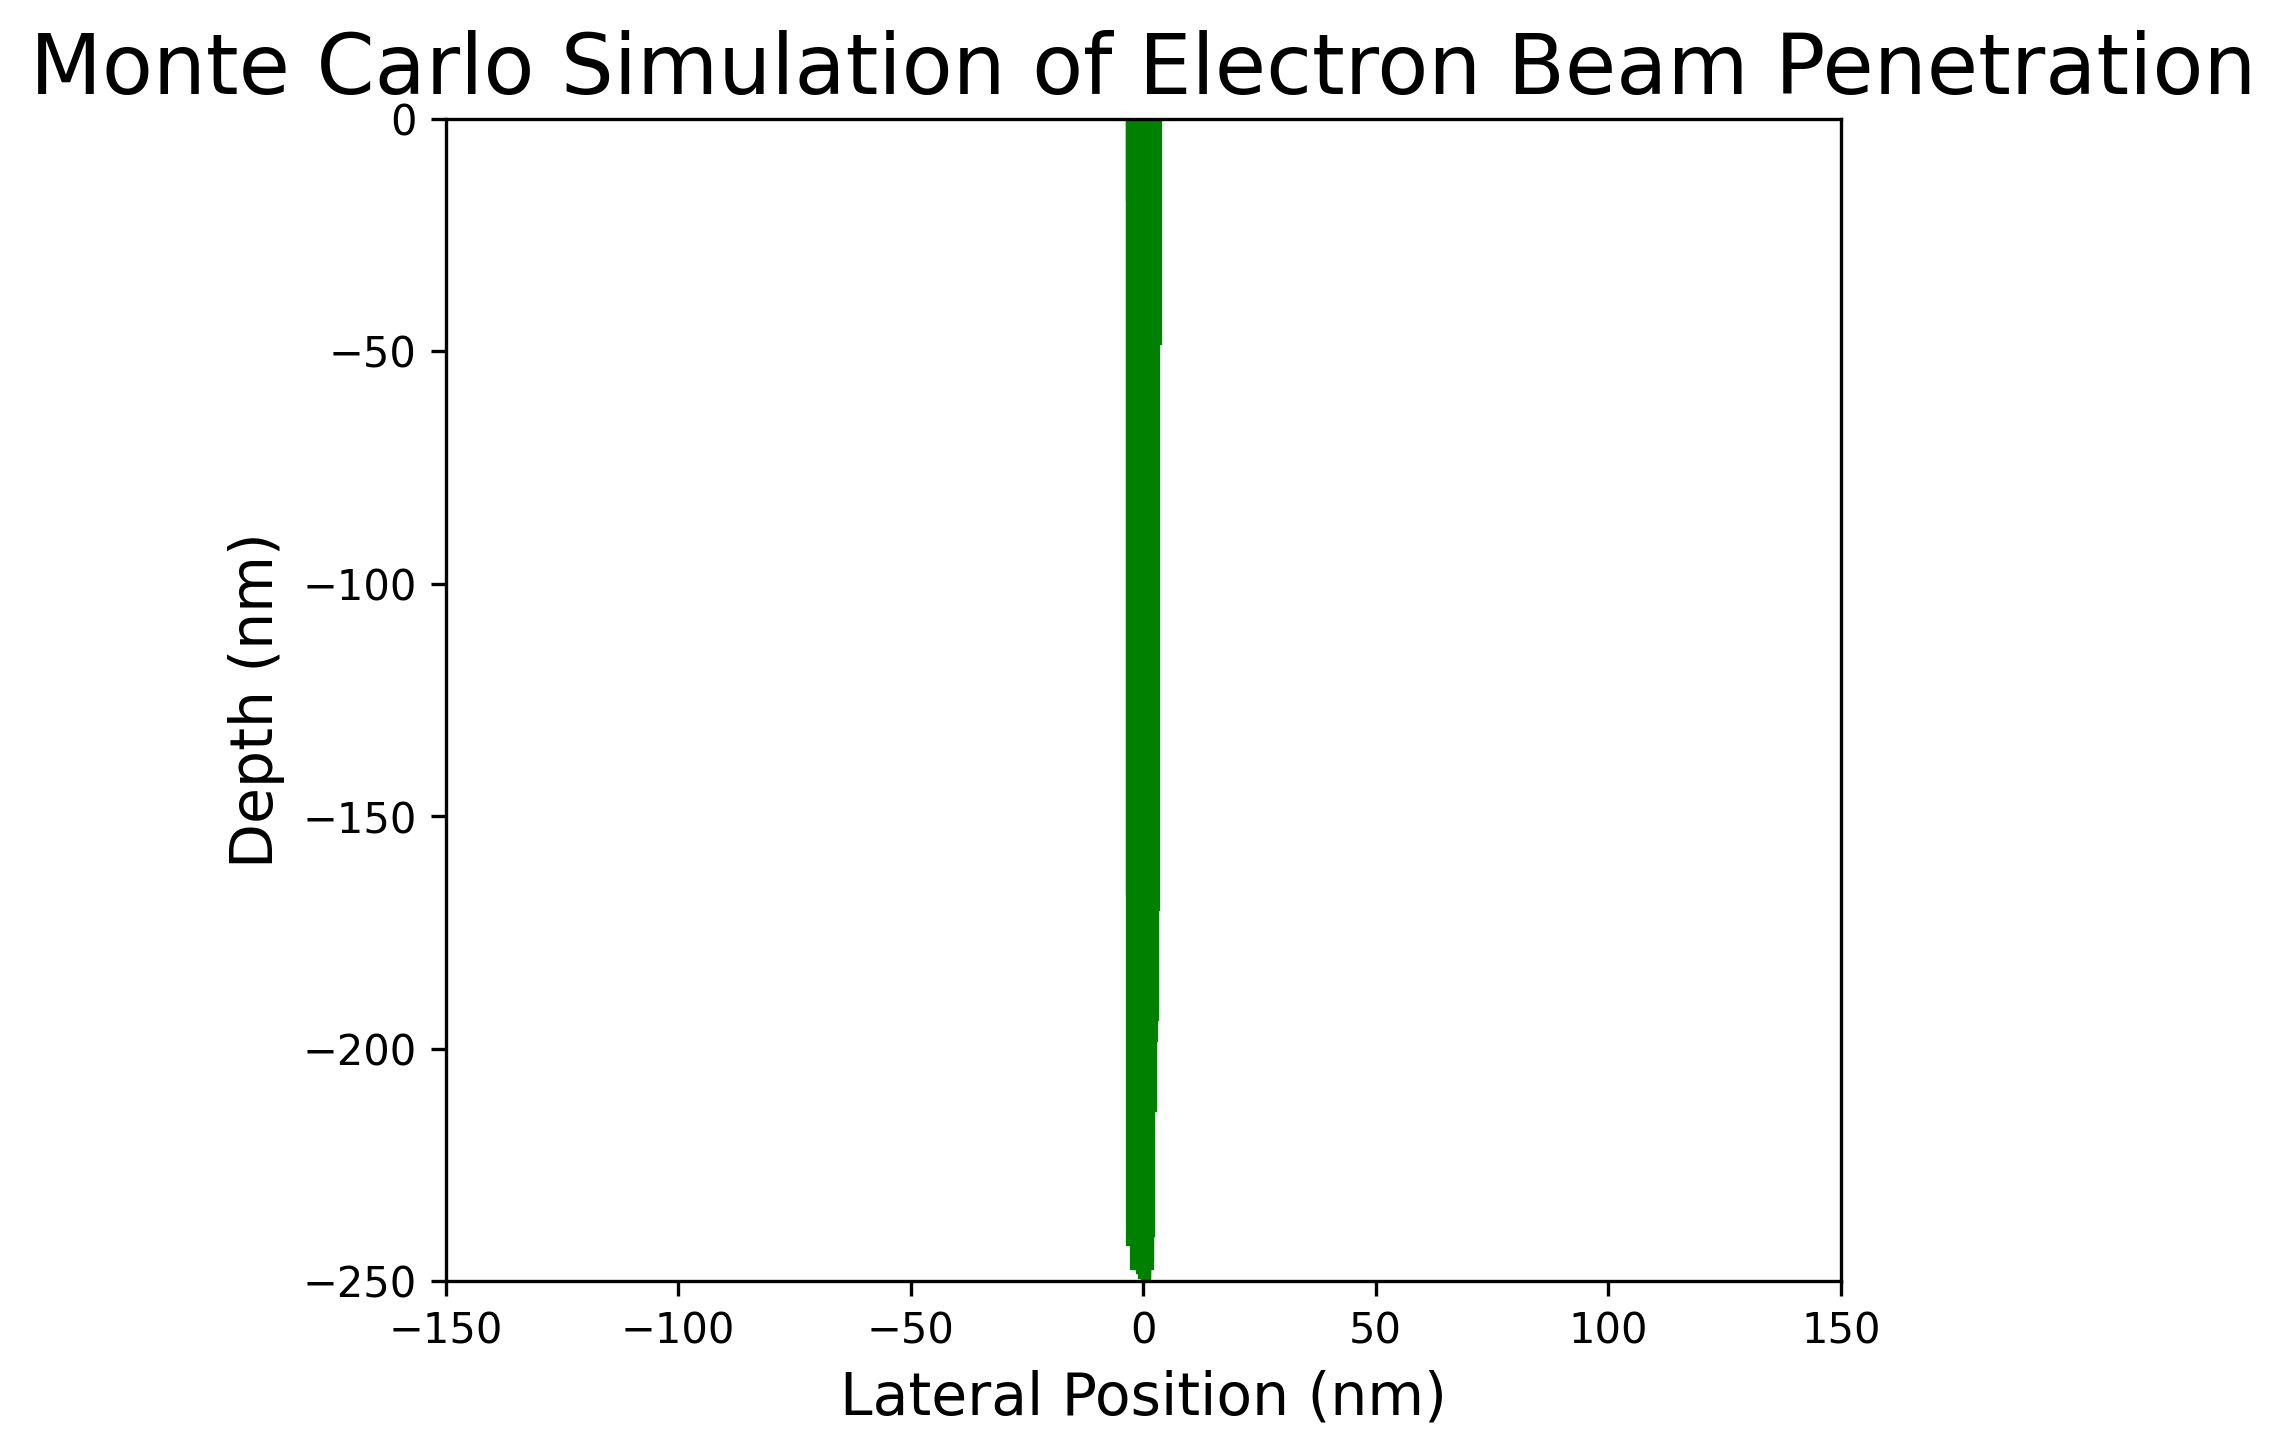

In [9]:
# Try with 250 nm resist thickness, a beam spot size of 2 nm, and x-axis range of -150 nm to 150 nm

# Constants for simulation
electron_energy_keV = 100  # Electron energy in keV
beam_dose_uSv_per_cm2 = 3000  # Beam dose in micro Sieverts per square centimeter
beam_spot_size_nm = 2  # Beam spot size in nm
resist_thickness_nm = 250  # Resist thickness in nm

# Conversion factors and constants
keV_to_Joule = 1.60218e-16  # Conversion from keV to Joules (1eV = 1.60218e-19 J)
uSv_to_Joule_per_kg = 1e-6  # Conversion from micro Sieverts to Joules per kg (1 Sv = 1 J/kg)
density_g_cm3 = 1.35  # Assumed density for egg white in g/cm^3 (value assumed for organic materials)
density_kg_m3 = density_g_cm3 * 1e3  # Convert density to kg/m^3

# Assuming a spherical beam spot for volume calculation, which is an approximation for the Monte Carlo point source
beam_radius_m = beam_spot_size_nm * 1e-9 / 2  # Convert nm to m and calculate radius
beam_area_m2 = np.pi * (beam_radius_m ** 2)  # Area of the beam spot in square meters

# Calculate total energy deposited per beam spot
total_energy_J = (beam_dose_uSv_per_cm2 * uSv_to_Joule_per_kg * density_kg_m3 * beam_area_m2)
energy_per_electron_J = electron_energy_keV * keV_to_Joule
number_of_electrons = total_energy_J / energy_per_electron_J  # Calculate the number of electrons

# Monte Carlo simulation parameters
number_of_simulated_electrons = 1000  # Number of electrons to simulate for plotting
max_depth_nm = resist_thickness_nm  # Maximum penetration depth in nm
x_range_nm = (-150, 150)  # X-axis range for plotting

# Generate random electron paths
paths = []
for _ in range(number_of_simulated_electrons):
    # For simplicity, assume each electron travels straight down with some lateral dispersion
    depth = np.random.uniform(0, max_depth_nm)
    x_dispersion = np.random.normal(0, beam_spot_size_nm / 2)  # Assume Gaussian spread around the beam spot size
    paths.append((x_dispersion, depth))

# Plotting the electron paths
plt.figure(figsize=(6, 6), dpi=300)
for path in paths:
    plt.plot([path[0], path[0]], [0, -path[1]], 'b', color='green')  # Plot each path as a green line

# Set the plot limits and labels
plt.xlim(x_range_nm)
plt.ylim(-resist_thickness_nm, 0)
plt.xlabel('Lateral Position (nm)', fontsize=14)
plt.ylabel('Depth (nm)', fontsize=14)
plt.title('Monte Carlo Simulation of Electron Beam Penetration', fontsize=20)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
